In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

In [3]:
# parameters
n_particles = 500000
n_steps = 50
step_size = 0.01

In [4]:
# define the target potential V and its gradient
def V(X1, X2):
    return (X1**4 + X2**4) / 4 - (X1**2 + X2**2) / 2

def grad_V(x):
    return np.array([
        x[0]**3 - x[0],
        x[1]**3 - x[1]
    ])

In [5]:
# initialize particles from standard normal
particles = np.random.normal(0, 1, size=(n_particles, 2))

# store initial particles for plotting
initial_particles = particles.copy()

# Langevin dynamics
for i in range(n_steps):
    noise = np.sqrt(2 * step_size) * np.random.randn(n_particles, 2)
    
    # compute gradients one by one (shape: [n_particles, 2])
    grads = np.array([grad_V(p) for p in particles])
    
    # update particles
    particles -= step_size * grads + noise

In [6]:
# define the grids for the density
x1 = np.linspace(-4, 4, 200)
x2 = np.linspace(-4, 4, 200)
X1, X2 = np.meshgrid(x1, x2)

# define density
Z = np.exp(-V(X1, X2))
Z /= np.trapz(np.trapz(Z, x2, axis=1), x1)

# histogram
initial_hist, xedges, yedges = np.histogram2d(
    initial_particles[:, 0], initial_particles[:, 1],
    bins=100, range=[[-4, 4], [-4, 4]], density=True
)
final_hist, _, _ = np.histogram2d(
    particles[:, 0], particles[:, 1],
    bins=100, range=[[-4, 4], [-4, 4]], density=True
)

/var/folders/gd/b2d40bms7s3f8y4f31x7pk1r0000gn/T/ipykernel_84144/644637180.py:8: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Z /= np.trapz(np.trapz(Z, x2, axis=1), x1)


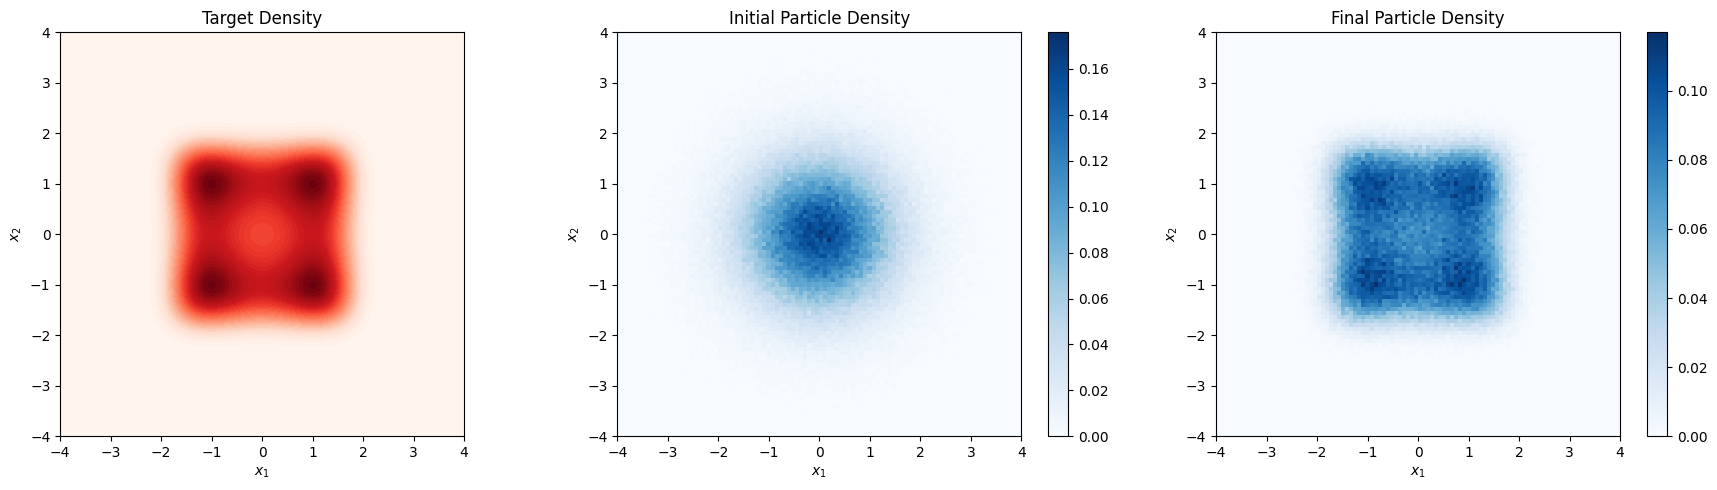

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# target density
axes[0].contourf(X1, X2, Z, levels=50, cmap='Reds')
axes[0].set_title('Target Density')
axes[0].set_xlabel('$x_1$')
axes[0].set_ylabel('$x_2$')
axes[0].set_aspect('equal')

# initial particle density
pcm1 = axes[1].imshow(initial_hist.T, origin='lower', extent=[-4, 4, -4, 4],
                      aspect='equal', cmap='Blues')
axes[1].set_title('Initial Particle Density')
axes[1].set_xlabel('$x_1$')
axes[1].set_ylabel('$x_2$')
fig.colorbar(pcm1, ax=axes[1])

# final particle density
pcm2 = axes[2].imshow(final_hist.T, origin='lower', extent=[-4, 4, -4, 4],
                      aspect='equal', cmap='Blues')
axes[2].set_title('Final Particle Density')
axes[2].set_xlabel('$x_1$')
axes[2].set_ylabel('$x_2$')
fig.colorbar(pcm2, ax=axes[2])

plt.tight_layout()
plt.show()